# Projeto: Análises do NBB 2019

Para esse projeto estaremos analisando jogos do NBB, principal campeonato brasileiro de basquetebol. Os dados contém os seguintes campos:

* Njogador-> Corresponde ao número de jogadores no time
* Temporada-> Ano de início da temporada
* Time       -> Nome do time que está jogando em casa
* Adversário -> Nome do time que está jogando fora de casa
* Casa/Fora  -> Correponde ao time está jogando em casa ou fora
* Jogador    -> Nome do jogador que estava na sumula do jogo
* Min        -> Minutos jogados do jogador
* Pts_C      -> Pontos Convertidos 
* Pts_T      -> Pontos Tentados 
* Pts_3_C    -> Três Pontos Convertidos 
* Pts_3_T    -> Três Pontos Tentados
* Pts_2_C    -> Dois Pontos Convertidos
* Pts_2_T    -> Dois Pontos Tentados
* LL_Pts_C   -> Lances Livres Convertidos
* LL_Pts_T   -> Lances Livres Tentados
* RO         -> Rebotes Ofensivos
* RD         -> Rebotes Defensivos
* RT         -> Rebotes Totais
* AS         -> Assistências
* BR         -> Bolas Roubadas 
* TO         -> Tocos
* FC         -> Faltas Cometidas
* FR         -> Faltas Recebidas 
* EN         -> Enterradas
* Ar_Pts_C   -> Arremessos dos Pontos Convertidos
* Ar_Pts_C   -> Arremessos dos Pontos Tentados 
* Pos        -> Posse de bola do time 

Objetivos a serem análisados: 
* ....

Bibliotecas utilizadas para análises estátisticas

In [1]:
import numpy as np
import pandas as pd
import datetime
import datetime as dt
from datetime import datetime
from datetime import timedelta

Bibliotacas utilizadas para plotar gráficos

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Lendo o arquivo csv que será utilizado para análise da Temporada 2019

In [3]:
df = pd.read_csv("Tabela_geral_2019_nova.csv")

In [4]:
df.drop('Unnamed: 0', axis = 1, inplace=True)

Verificar as Informações do Data.Frame

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5079 entries, 0 to 5078
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Njogador   5079 non-null   int64 
 1   Temporada  5079 non-null   int64 
 2   Time       5079 non-null   object
 3   Adv        5079 non-null   object
 4   C_F        5079 non-null   int64 
 5   Jogador    5079 non-null   object
 6   Min        5079 non-null   object
 7   Pts_C      5079 non-null   int64 
 8   Pts_T      5079 non-null   int64 
 9   Pts_3_C    5079 non-null   int64 
 10  Pts_3_T    5079 non-null   int64 
 11  Pts_2_C    5079 non-null   int64 
 12  Pts_2_T    5079 non-null   int64 
 13  LL_Pts_C   5079 non-null   int64 
 14  LL_Pts_T   5079 non-null   int64 
 15  RO         5079 non-null   int64 
 16  RD         5079 non-null   int64 
 17  RT         5079 non-null   int64 
 18  AS         5079 non-null   int64 
 19  BR         5079 non-null   int64 
 20  TO         5079 non-null   int

Verificação do cabeçalho do df

In [6]:
df.head(13)

,Njogador,Temporada,Time,Adv,C_F,Jogador,Min,Pts_C,Pts_T,Pts_3_C,...,RO,RD,RT,AS,BR,TO,FC,FR,ER,EN
0,0,19,UNIFACISA,São Paulo,1,Barnes,33:7,23,44,4,...,0,0,0,5,0,0,4,4,2,0
1,1,19,UNIFACISA,São Paulo,1,Gemerson,31:8,18,29,2,...,4,6,10,3,1,0,5,3,1,1
2,2,19,UNIFACISA,São Paulo,1,Dixson,24:2,17,27,1,...,0,2,2,0,1,2,4,2,1,2
3,3,19,UNIFACISA,São Paulo,1,Miller,23:1,15,35,3,...,1,4,5,0,0,0,4,0,1,0
4,4,19,UNIFACISA,São Paulo,1,Antonio,20:4,10,16,0,...,1,4,5,2,1,0,2,3,1,1
5,5,19,UNIFACISA,São Paulo,1,Douglas Nunes,15:9,8,16,2,...,1,1,2,1,0,0,0,2,1,1
6,6,19,UNIFACISA,São Paulo,1,Gemadinha,8:5,5,8,1,...,0,0,0,1,0,0,1,1,0,0
7,7,19,UNIFACISA,São Paulo,1,Gabriel,11:0,3,6,0,...,1,0,1,2,0,0,2,1,0,0
8,8,19,UNIFACISA,São Paulo,1,João Vitor,10:6,2,6,0,...,0,2,2,0,0,0,4,0,1,1
9,9,19,UNIFACISA,São Paulo,1,Pepo Vidal,20:9,2,12,0,...,0,4,4,7,2,0,1,0,1,0


# Perguntas Básicas 

Quantos Times participam do campeonato?

In [7]:
df['Time'].unique()

array(['UNIFACISA', 'São Paulo', 'Pinheiros', 'Brasília', 'Corinthians',
       'Minas', 'Sesi Franca', 'Bauru', 'São José', 'Mogi', 'Rio Claro',
       'Paulistano', 'Pato Basquete', 'Basq. Cearense', 'Botafogo',
       'Flamengo'], dtype=object)

In [8]:
df['Time'].nunique()

16

Quantos Jogadores participaram do Campeonato?

In [9]:
df['Jogador'].unique()

array(['Barnes', 'Gemerson', 'Dixson', 'Miller', 'Antonio',
       'Douglas Nunes', 'Gemadinha', 'Gabriel', 'João Vitor',
       'Pepo Vidal', 'R. Piru', 'Pezão', 'Equipe', 'Jefferson', 'Shamell',
       'Renan', 'Léo Meindl', 'Georginho', 'Holloway', 'Murilo', 'Kurtz',
       'Mamedes', 'Jones', 'Igor', 'Danilo', 'Dawkins', 'L. Cauê',
       'C. Torres', 'Bennett', 'Isaac', 'Scaglia', 'Ware', 'Betinho',
       'Buffat', 'Toledo', 'Nezinho', 'B. Fiorotto', 'Pedrinho Rava',
       'Rafa Moreira', 'Marcelão', 'Arthur', 'Suassuna', 'Felipe',
       'Nesbitt', 'Fischer', 'Wesley', 'Robinson', 'Vezaro', 'Johnson',
       'Fuller', 'Teichmann', 'Pecos', 'Douglas Santos', 'Scott', 'Alex',
       'Deodato', 'Leandrinho', 'Davi', 'Black', 'Tyrone', 'Jackson Jr',
       'Shilton', 'Alexei', 'Queiroz', 'Hettsheimeir', 'Lucas Dias',
       'David Jackson', 'Parodi', 'Guilherme', 'Jimmy', 'Cipolini',
       'Elinho', 'Edu Marília', 'Márcio', 'Adyel', 'Wiggins', 'Draper',
       'Crescenzi', 'Faggia

In [10]:
df['Jogador'].nunique()

234

Quantos atletas por time?

In [11]:
UNIFACISA = df.query("Time == 'UNIFACISA'")
Sao_Paulo = df.query("Time == 'São Paulo'")
Pinheiros = df.query("Time == 'Pinheiros'")
Brasilia = df.query("Time == 'Brasília'")
Corinthians = df.query("Time == 'Corinthians'")
Minas = df.query("Time == 'Minas'")
Sesi_Franca = df.query("Time == 'Sesi Franca'")
Bauru = df.query("Time == 'Bauru'")
Sao_Jose = df.query("Time == 'São José'")
Mogi = df.query("Time == 'Mogi'")
Rio_Claro = df.query("Time == 'Rio Claro'")
Paulistano = df.query("Time == 'Paulistano'")
Pato_Basquete = df.query("Time == 'Pato Basquete'")
Basq_Cearense = df.query("Time == 'Basq. Cearense'")
Botafogo = df.query("Time == 'Botafogo'")
Flamengo = df.query("Time == 'Flamengo'")

Gráfico dos indicaodres técnicos para cada time

In [12]:
UNIFACISA_jogo_soma = UNIFACISA.query("Jogador == 'Equipe'").sum(axis=0, numeric_only=True)

In [13]:
Sao_Paulo_jogo_soma = Sao_Paulo.query("Jogador == 'Equipe'").sum(axis=0, numeric_only=True)

In [14]:
time_soma = df.groupby('Time').sum()

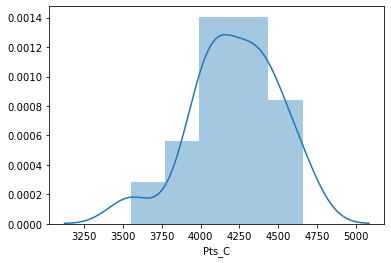

In [15]:
sns.distplot(time_soma['Pts_C'])

da para fazer um for e colocar um gráfico para cada time como o cara da Live#006 fez

In [16]:
UNIFACISA['Jogador'].unique()

array(['Barnes', 'Gemerson', 'Dixson', 'Miller', 'Antonio',
       'Douglas Nunes', 'Gemadinha', 'Gabriel', 'João Vitor',
       'Pepo Vidal', 'R. Piru', 'Pezão', 'Equipe', 'Nicolas Ronsini',
       'Paulo Nery', 'Spencer', 'Rodrigo Piru', 'D. Nunes',
       'Ações coletivas'], dtype=object)

In [17]:
UNIFACISA['Jogador'].nunique()

19

In [18]:
UNIFACISA.head(13)

,Njogador,Temporada,Time,Adv,C_F,Jogador,Min,Pts_C,Pts_T,Pts_3_C,...,RO,RD,RT,AS,BR,TO,FC,FR,ER,EN
0,0,19,UNIFACISA,São Paulo,1,Barnes,33:7,23,44,4,...,0,0,0,5,0,0,4,4,2,0
1,1,19,UNIFACISA,São Paulo,1,Gemerson,31:8,18,29,2,...,4,6,10,3,1,0,5,3,1,1
2,2,19,UNIFACISA,São Paulo,1,Dixson,24:2,17,27,1,...,0,2,2,0,1,2,4,2,1,2
3,3,19,UNIFACISA,São Paulo,1,Miller,23:1,15,35,3,...,1,4,5,0,0,0,4,0,1,0
4,4,19,UNIFACISA,São Paulo,1,Antonio,20:4,10,16,0,...,1,4,5,2,1,0,2,3,1,1
5,5,19,UNIFACISA,São Paulo,1,Douglas Nunes,15:9,8,16,2,...,1,1,2,1,0,0,0,2,1,1
6,6,19,UNIFACISA,São Paulo,1,Gemadinha,8:5,5,8,1,...,0,0,0,1,0,0,1,1,0,0
7,7,19,UNIFACISA,São Paulo,1,Gabriel,11:0,3,6,0,...,1,0,1,2,0,0,2,1,0,0
8,8,19,UNIFACISA,São Paulo,1,João Vitor,10:6,2,6,0,...,0,2,2,0,0,0,4,0,1,1
9,9,19,UNIFACISA,São Paulo,1,Pepo Vidal,20:9,2,12,0,...,0,4,4,7,2,0,1,0,1,0


In [19]:
UNIFACISA_jogo = UNIFACISA.query("Jogador == 'Equipe'")

In [20]:
UNIFACISA_jogo.head()

,Njogador,Temporada,Time,Adv,C_F,Jogador,Min,Pts_C,Pts_T,Pts_3_C,...,RO,RD,RT,AS,BR,TO,FC,FR,ER,EN
12,12,19,UNIFACISA,São Paulo,1,Equipe,0:0,103,199,13,...,9,29,38,21,5,2,27,16,9,6
224,12,19,UNIFACISA,Paulistano,1,Equipe,0:0,101,213,16,...,15,30,45,22,2,4,16,17,8,1
577,11,19,UNIFACISA,Rio Claro,2,Equipe,0:0,80,168,9,...,9,24,33,14,3,4,24,22,13,1
697,11,19,UNIFACISA,Pato Basquete,2,Equipe,0:0,61,163,5,...,9,30,39,14,6,3,16,18,16,1
930,12,19,UNIFACISA,Bauru,1,Equipe,0:0,83,169,15,...,7,29,36,25,10,3,18,14,11,4


In [21]:
UNIFACISA_jogo.describe()

,Njogador,Temporada,C_F,Pts_C,Pts_T,Pts_3_C,Pts_3_T,Pts_2_C,Pts_2_T,LL_Pts_C,...,RO,RD,RT,AS,BR,TO,FC,FR,ER,EN
count,27.000000,27.0,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,...,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000
mean,11.592593,19.0,1.444444,83.185185,177.444444,10.148148,28.814815,19.703704,36.703704,13.333333,...,10.111111,27.481481,37.592593,18.370370,6.666667,2.629630,19.962963,18.518519,12.740741,2.074074
std,0.747265,0.0,0.506370,11.156361,14.407085,3.820025,5.993824,3.800960,5.882273,4.747469,...,3.117362,3.651874,5.085872,3.498881,2.974248,1.497386,3.480511,2.679988,3.346555,1.491667
min,10.000000,19.0,1.000000,61.000000,151.000000,5.000000,19.000000,11.000000,24.000000,3.000000,...,5.000000,20.000000,27.000000,13.000000,2.000000,0.000000,15.000000,14.000000,7.000000,0.000000
25%,11.000000,19.0,1.000000,76.000000,168.500000,7.500000,25.000000,17.500000,33.500000,10.000000,...,8.000000,24.000000,33.500000,15.000000,5.000000,2.000000,17.000000,17.000000,10.000000,1.000000
50%,12.000000,19.0,1.000000,81.000000,175.000000,9.000000,29.000000,19.000000,36.000000,14.000000,...,9.000000,29.000000,38.000000,19.000000,6.000000,2.000000,20.000000,18.000000,12.000000,2.000000
75%,12.000000,19.0,2.000000,90.000000,186.000000,13.000000,32.000000,22.500000,42.000000,17.000000,...,11.500000,30.000000,41.000000,21.000000,9.000000,4.000000,22.000000,20.000000,15.000000,3.000000
max,13.000000,19.0,2.000000,103.000000,213.000000,21.000000,44.000000,27.000000,48.000000,22.000000,...,17.000000,33.000000,46.000000,25.000000,12.000000,6.000000,27.000000,24.000000,19.000000,6.000000


# Converter str em min para utilizar em jogada jogada

In [22]:
type(df['Min'][0])

str

In [23]:
min = datetime.strptime(df['Min'][2], '%M:%S')

In [24]:
print(min)

1900-01-01 00:24:02


Transformando o str em datetime

In [25]:
df['Min'] = df['Min'].apply(lambda x: datetime.strptime(x, '%M:%S'))

In [26]:
df['Min'] = df['Min'].apply(lambda x: dt.time(x.hour, x.minute, x.second))

In [27]:
type(df['Min'][0])

datetime.time

In [28]:
df

,Njogador,Temporada,Time,Adv,C_F,Jogador,Min,Pts_C,Pts_T,Pts_3_C,...,RO,RD,RT,AS,BR,TO,FC,FR,ER,EN
0,0,19,UNIFACISA,São Paulo,1,Barnes,00:33:07,23,44,4,...,0,0,0,5,0,0,4,4,2,0
1,1,19,UNIFACISA,São Paulo,1,Gemerson,00:31:08,18,29,2,...,4,6,10,3,1,0,5,3,1,1
2,2,19,UNIFACISA,São Paulo,1,Dixson,00:24:02,17,27,1,...,0,2,2,0,1,2,4,2,1,2
3,3,19,UNIFACISA,São Paulo,1,Miller,00:23:01,15,35,3,...,1,4,5,0,0,0,4,0,1,0
4,4,19,UNIFACISA,São Paulo,1,Antonio,00:20:04,10,16,0,...,1,4,5,2,1,0,2,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5074,9,19,Flamengo,Minas,2,Ruan,00:00:00,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5075,10,19,Flamengo,Minas,2,Zach Graham,00:29:02,17,20,1,...,0,3,3,1,0,0,2,2,2,0
5076,11,19,Flamengo,Minas,2,Léo Demétrio,00:15:51,14,24,0,...,1,3,4,0,0,0,3,0,1,0
5077,12,19,Flamengo,Minas,2,Ações coletivas,00:00:00,0,0,0,...,2,5,7,0,0,0,0,0,0,0
